# Use machine learning approach to identify the quality of the wine

* 1 - fixed acidity
* 2 - volatile acidity
* 3 - citric acid
* 4 - residual sugar
* 5 - chlorides
* 6 - free sulfur dioxide
* 7 - total sulfur dioxide
* 8 - density
* 9 - pH
* 10 - sulphates
* 11 - alcohol Output variable
* 12 - quality (score between 0 and 10) - **1(good) if quality is more than 5** else **0(not good) if quality is less than 7**

## Source of original dataset: 
https://archive.ics.uci.edu/ml/datasets/wine+quality

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Reading CSV

In [2]:
df = pd.read_csv("wine_data.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Checking info of the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Checking for null values in the data

In [4]:
df.isnull().sum()  ## No null values in the data

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Checking for blank values

In [5]:
np.where(df == " ")  ## No blank strings in the data

(array([], dtype=int64), array([], dtype=int64))

# Checking value counts of the target variable

In [6]:
df.quality.value_counts() ## Class 5,6 and 7 have the maximum data (Class imbalance)

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# Checking range of all variables

In [7]:
## Defining a function for finding the range

def range_finder(col):
    """
    Function to find the range of the numerical columns
    """
    print("Range: {} - {}".format(col.min(), col.max()))

In [8]:
for col in df.columns:
    print(col)
    range_finder(df[col])
    print("*"*5)

fixed acidity
Range: 4.6 - 15.9
*****
volatile acidity
Range: 0.12 - 1.58
*****
citric acid
Range: 0.0 - 1.0
*****
residual sugar
Range: 0.9 - 15.5
*****
chlorides
Range: 0.012 - 0.611
*****
free sulfur dioxide
Range: 1.0 - 72.0
*****
total sulfur dioxide
Range: 6.0 - 289.0
*****
density
Range: 0.99007 - 1.00369
*****
pH
Range: 2.74 - 4.01
*****
sulphates
Range: 0.33 - 2.0
*****
alcohol
Range: 8.4 - 14.9
*****
quality
Range: 3 - 8
*****


# Checking for duplicate values and removing them

In [9]:
df.duplicated().sum()  ## 240 duplicate entries

240

In [10]:
df.drop_duplicates(inplace = True)  ## dropping duplicate entries

In [11]:
df.shape

(1359, 12)

In [12]:
1599-240  ## confirming if exact number of rows were dropped

1359

In [13]:
## Checking value count after duplicates removal

df.quality.value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

# Checking for total unique values in each column

In [14]:
for col in df.columns:
    a = df[col].nunique()
    print(col, ": total unique-", a, '\n')

fixed acidity : total unique- 96 

volatile acidity : total unique- 143 

citric acid : total unique- 80 

residual sugar : total unique- 91 

chlorides : total unique- 153 

free sulfur dioxide : total unique- 60 

total sulfur dioxide : total unique- 144 

density : total unique- 436 

pH : total unique- 89 

sulphates : total unique- 96 

alcohol : total unique- 65 

quality : total unique- 6 



# Visualization

## 1. Box plots

Feature:  fixed acidity


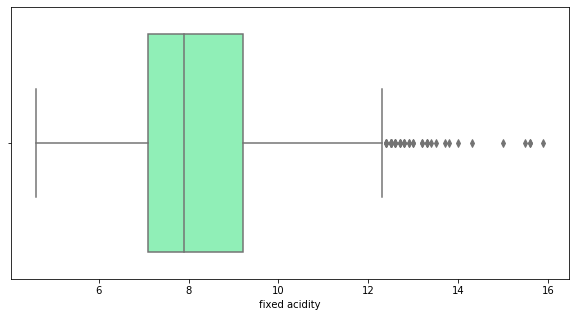

Feature:  volatile acidity


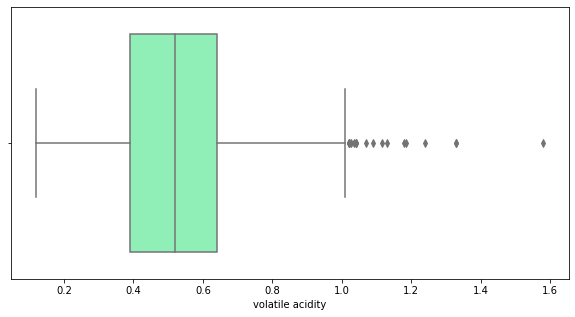

Feature:  citric acid


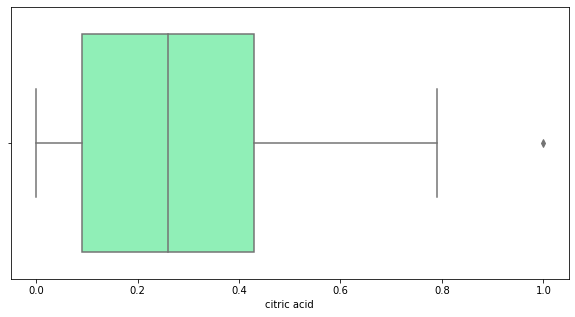

Feature:  residual sugar


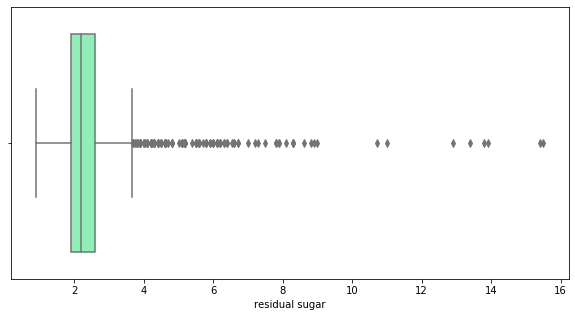

Feature:  chlorides


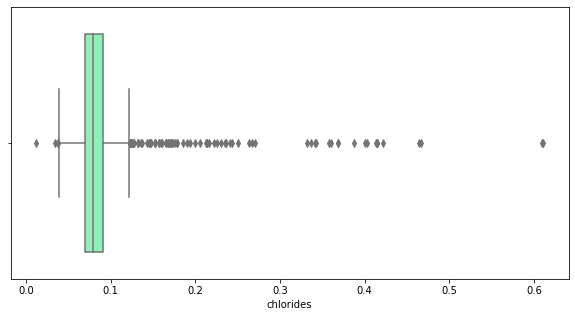

Feature:  free sulfur dioxide


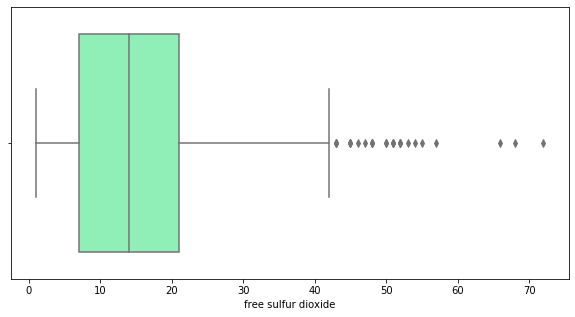

Feature:  total sulfur dioxide


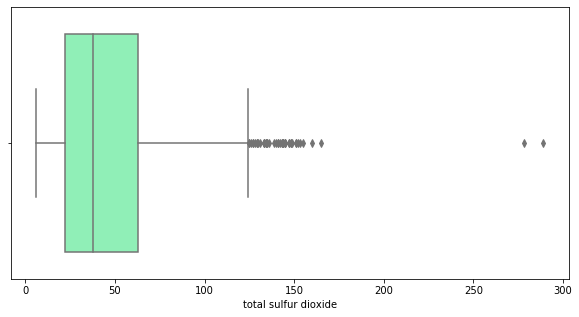

Feature:  density


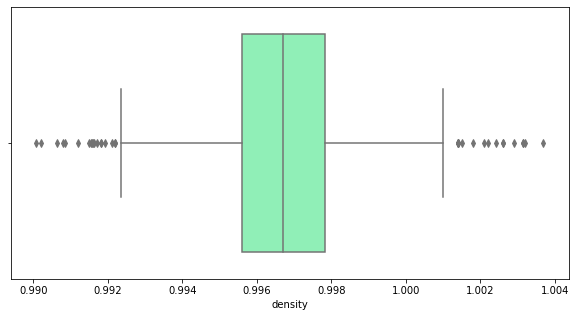

Feature:  pH


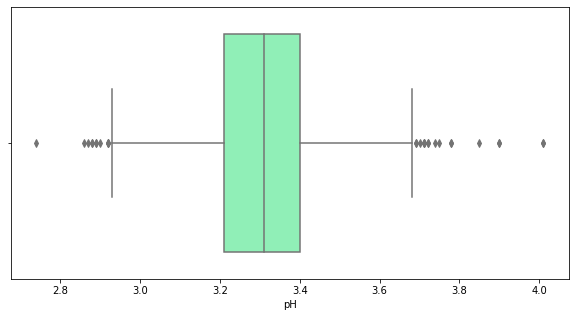

Feature:  sulphates


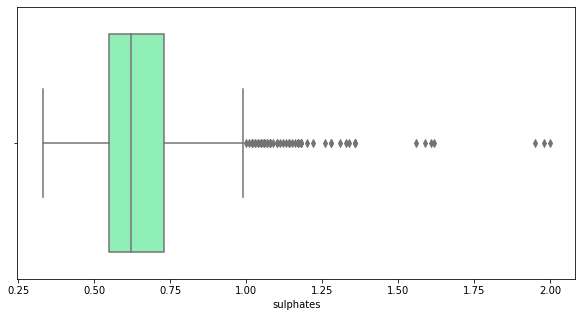

Feature:  alcohol


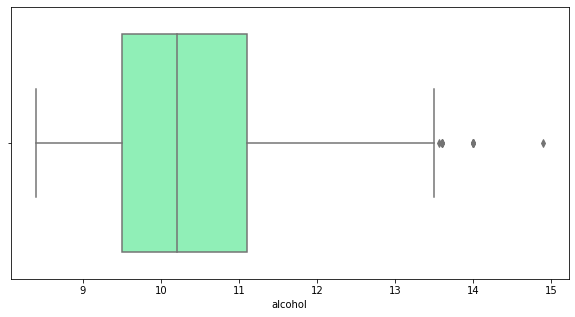

Feature:  quality


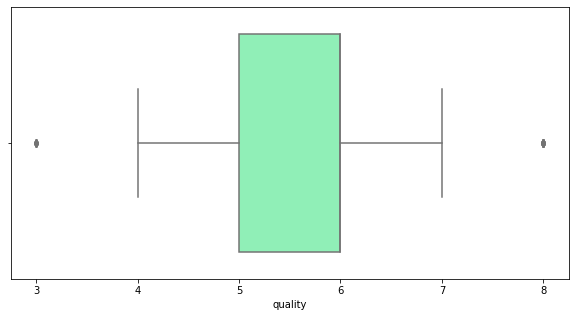

In [15]:
for col in df.columns:
    fig = plt.figure(figsize =(10,5))
    sns.boxplot(x = df[col], data= df, palette='rainbow', orient='h', )
    print('Feature: ', col)
    plt.show()

## 2. Quantile plots 

feature:  fixed acidity 




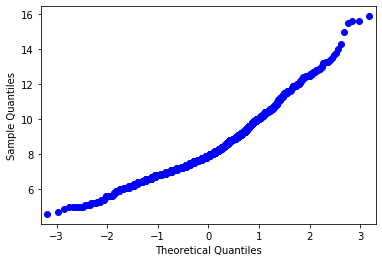

feature:  volatile acidity 




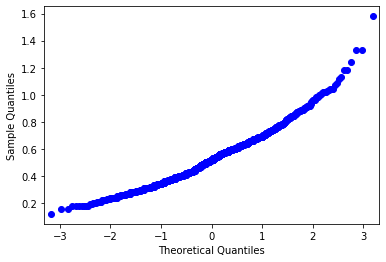

feature:  citric acid 




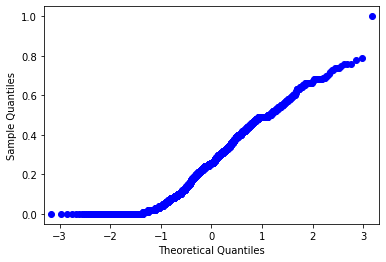

feature:  residual sugar 




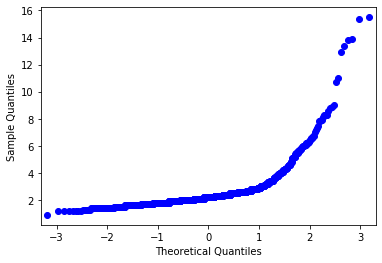

feature:  chlorides 




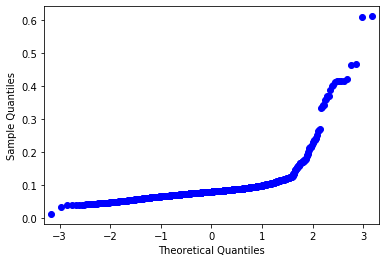

feature:  free sulfur dioxide 




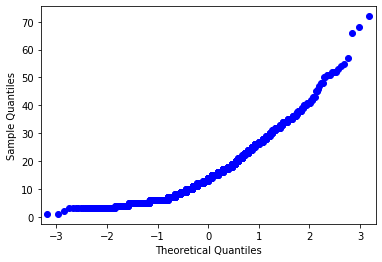

feature:  total sulfur dioxide 




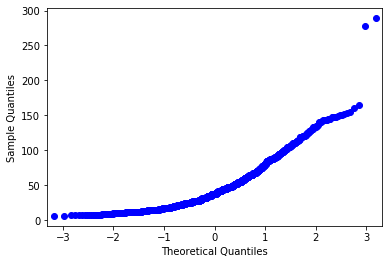

feature:  density 




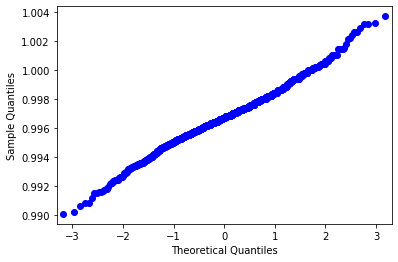

feature:  pH 




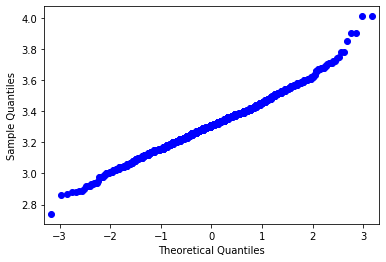

feature:  sulphates 




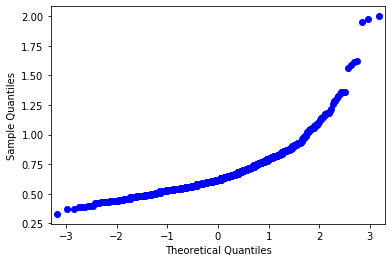

feature:  alcohol 




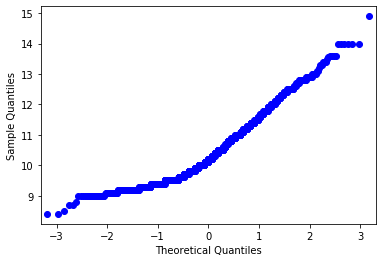

feature:  quality 




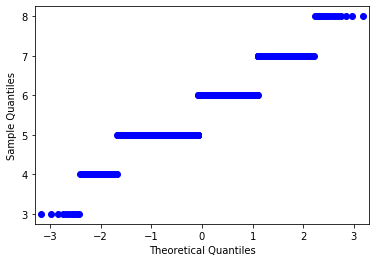

In [16]:
import statsmodels.api as sm
import pylab as py


for col in df.columns:
    sm.qqplot(df[col])
    print("feature: ", col, "\n"*2)
    py.show()

## 3. Distribution plots

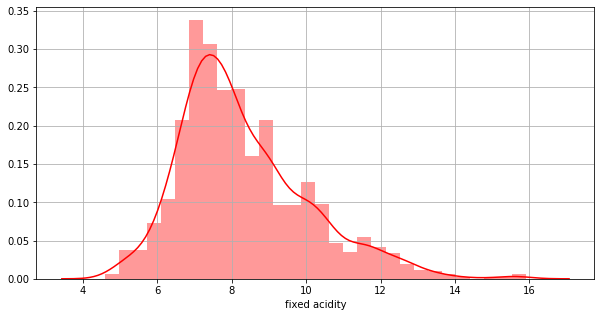

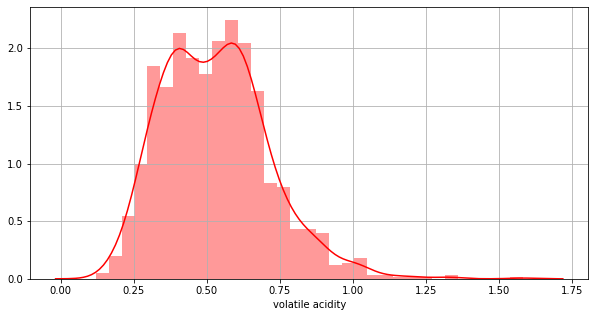

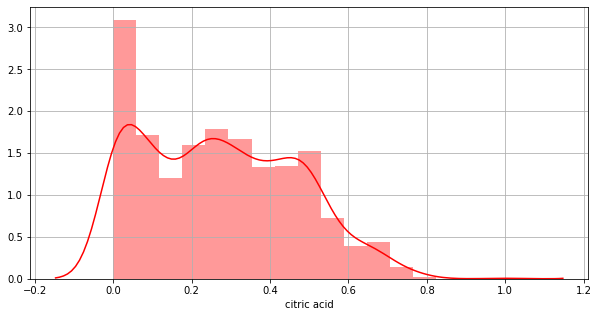

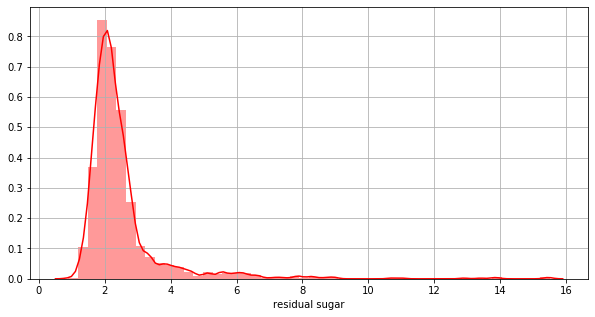

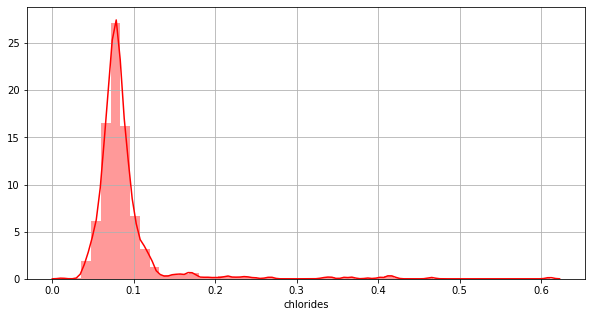

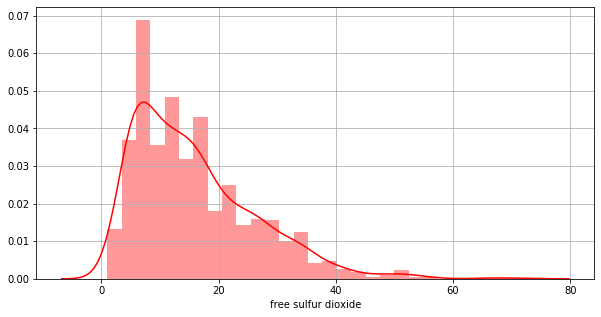

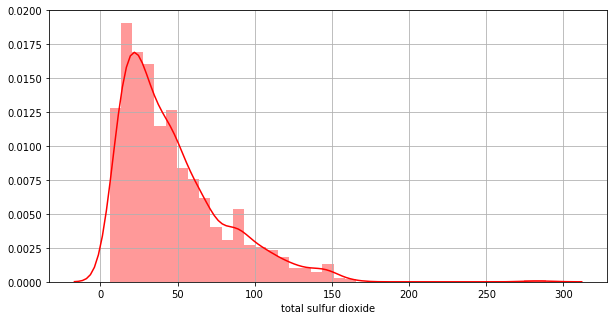

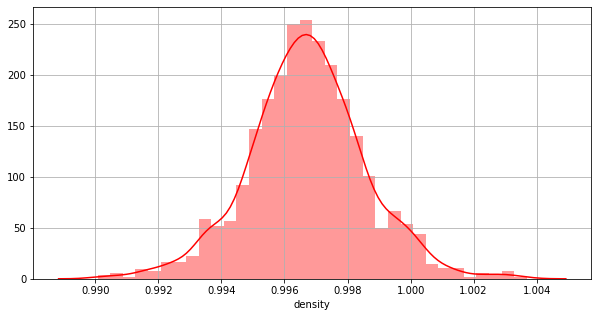

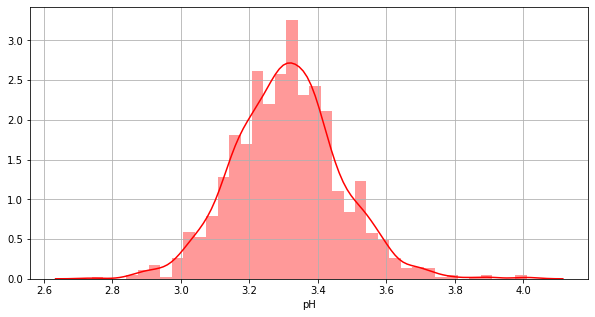

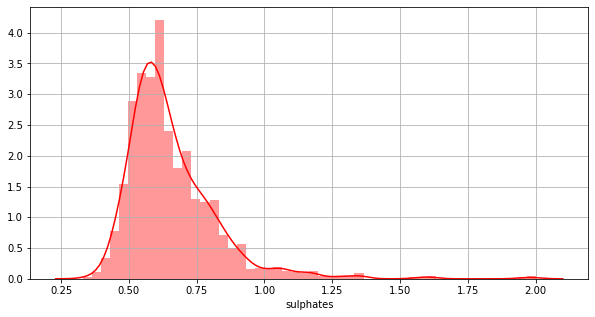

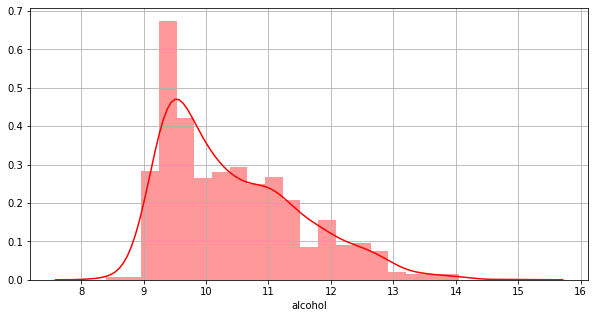

In [17]:
for col in df.iloc[:,:-1].columns:
    fig = plt.figure(figsize =(10,5))
    sns.distplot(df[col], color ='red')
    plt.grid()
    
## most of the data is skewed

# Checking the correlation between values

In [18]:
df.corr()    ## very low correlation between target variable and other variables

## High positive corr between fixed acidity and citric acid
## High positive corr between fixed acidity and density
## High negative corr between fixed acidity and ph
## High negative corr brtween volatile acidity and citric acid
## High negative corr between cirtic acid and ph
## High positive corr between free sulfur dioxide and total sulfur dioxide

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


## 4. Analysing variation in target wrt all other variables using bar graphs

Feature:  fixed acidity


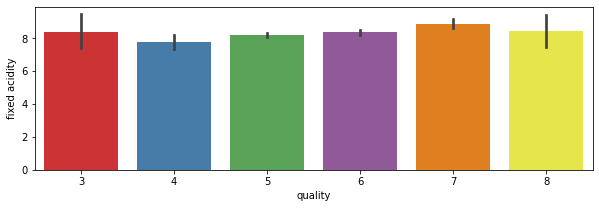

*****************************************************************************************************************************
Feature:  volatile acidity


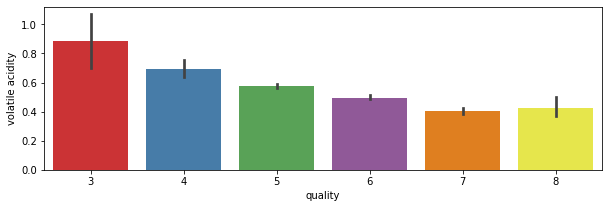

*****************************************************************************************************************************
Feature:  citric acid


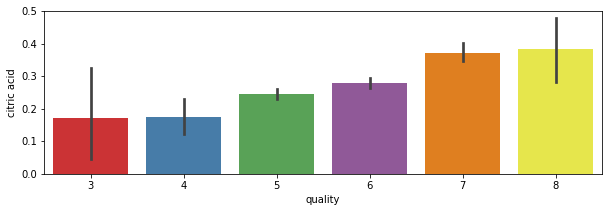

*****************************************************************************************************************************
Feature:  residual sugar


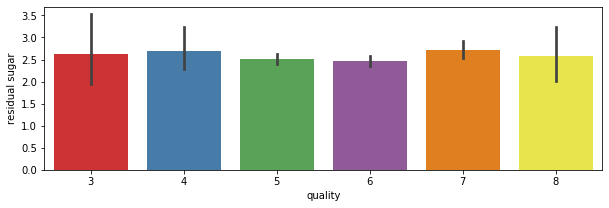

*****************************************************************************************************************************
Feature:  chlorides


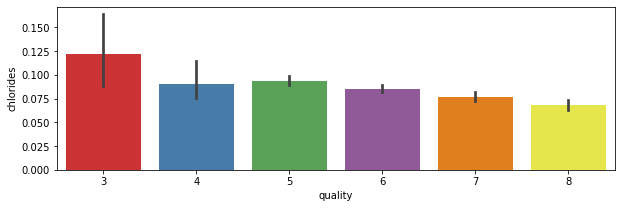

*****************************************************************************************************************************
Feature:  free sulfur dioxide


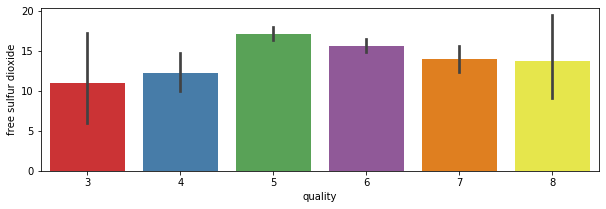

*****************************************************************************************************************************
Feature:  total sulfur dioxide


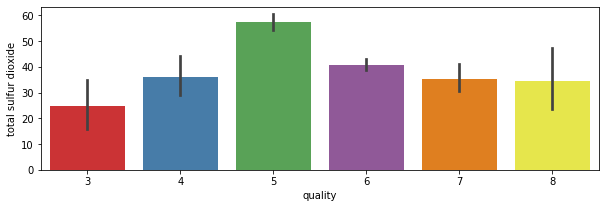

*****************************************************************************************************************************
Feature:  density


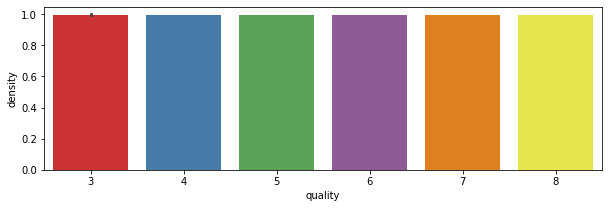

*****************************************************************************************************************************
Feature:  pH


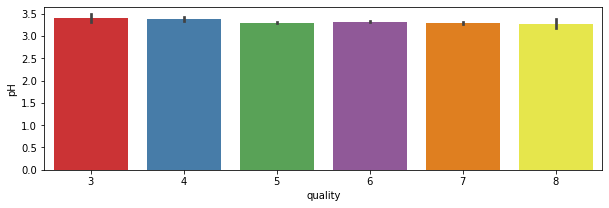

*****************************************************************************************************************************
Feature:  sulphates


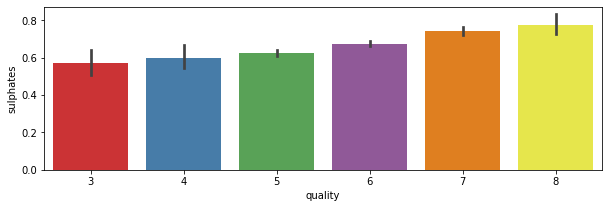

*****************************************************************************************************************************
Feature:  alcohol


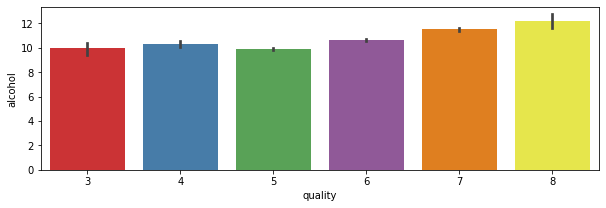

*****************************************************************************************************************************


In [19]:
for col in df.iloc[:, :-1].columns:

    fig = plt.figure(figsize =(10,3))
    print("Feature: ", col)
    sns.barplot(x= 'quality', y = df[col],data=df, palette = 'Set1')
    plt.show()
    print('*'*125)
    
## More volatile acidity implies bad quaality = inversly proportional
## More cirtic acid implies good quality = directly proprtional
## More cholorides imply bad quality = inversly proportional (quality degrages with more chlorides)
## Density, pH don't seem to be affect quality
## More sulphates = better quality
## More alcohol = better quality

## 5. Creating a count plot for quality

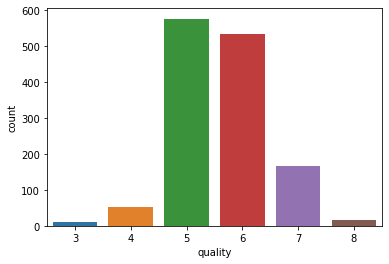

In [20]:
sns.countplot(x='quality',data=df)

## Categories 5 and 6 have a maximum data (clear case of class imbalance)

## 6. Pie Chart for checking distribution in quality

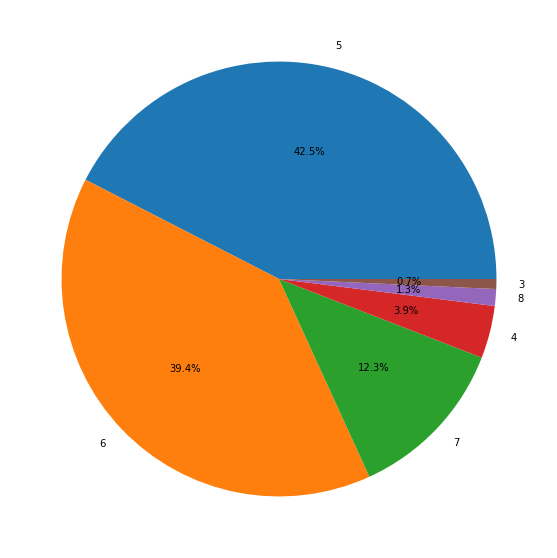

In [22]:
fig = plt.figure(figsize = (10,10))

plt.pie(df.quality.value_counts(),
        labels = df.quality.unique(),    
        autopct = '%0.1f%%' );   

## Largely imbalanced classes

### We have a large number of categories in quality column, so reducing them to 3 categories

In [21]:
df['grade'] = df['quality'].apply(lambda x: 'poor' if x<=5 else "average" if x ==6 else "good")

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,grade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,poor
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,poor
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,poor
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,average
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,poor


### Checking count of new categories

In [14]:
df.grade.value_counts()

poor       640
average    535
good       184
Name: grade, dtype: int64

## 7. Checking distribution of new target categories using pie chart

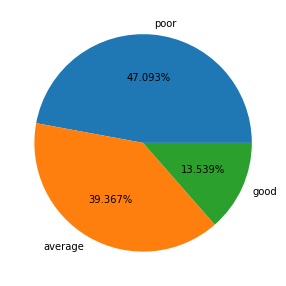

In [15]:
fig = plt.figure(figsize = (5,5))

plt.pie(df.grade.value_counts(),
        labels = df.grade.unique(),    
        autopct = '%0.3f%%' );  

## Good has the least values (again class imbalance)

## 8. Analysing variation in new target wrt all other variables using bar graphs

Feature:  fixed acidity


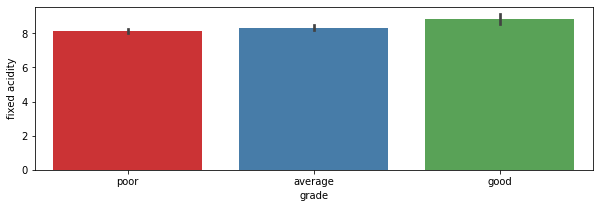

*****************************************************************************************************************************
Feature:  volatile acidity


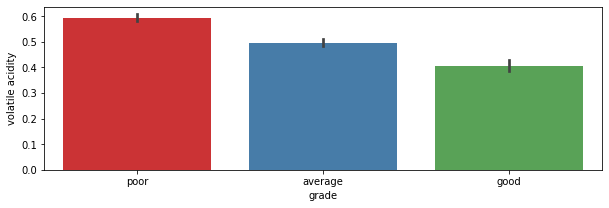

*****************************************************************************************************************************
Feature:  citric acid


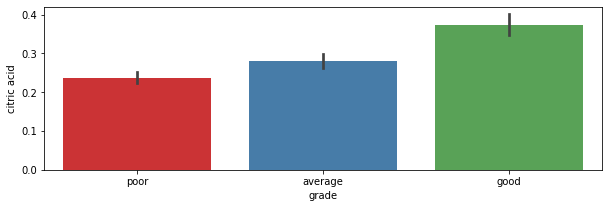

*****************************************************************************************************************************
Feature:  residual sugar


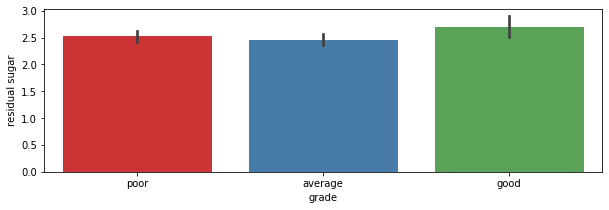

*****************************************************************************************************************************
Feature:  chlorides


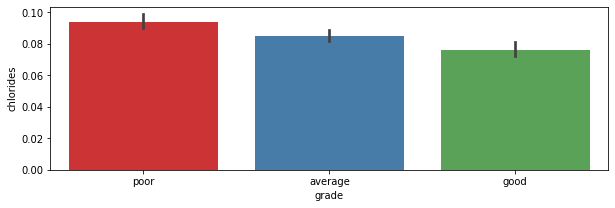

*****************************************************************************************************************************
Feature:  free sulfur dioxide


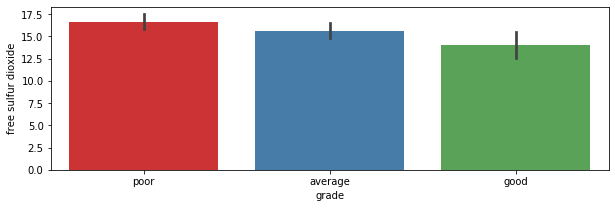

*****************************************************************************************************************************
Feature:  total sulfur dioxide


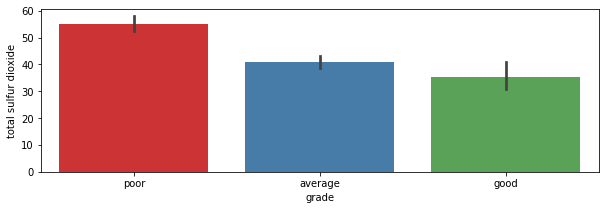

*****************************************************************************************************************************
Feature:  density


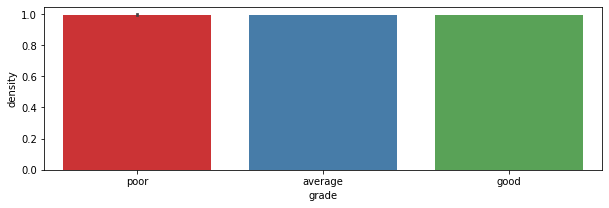

*****************************************************************************************************************************
Feature:  pH


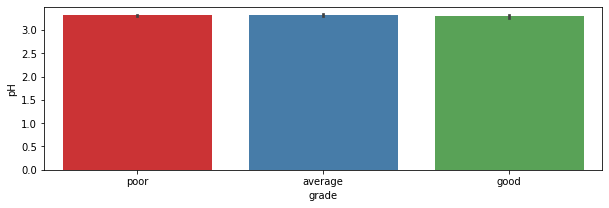

*****************************************************************************************************************************
Feature:  sulphates


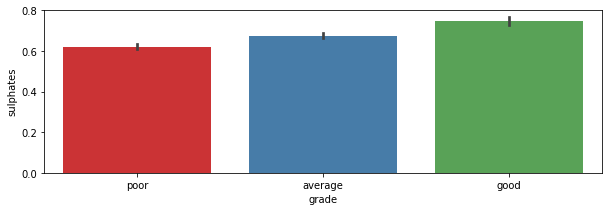

*****************************************************************************************************************************
Feature:  alcohol


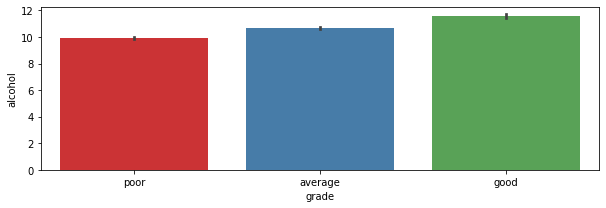

*****************************************************************************************************************************


In [19]:
for col in df.iloc[:,:-2].columns:

    fig = plt.figure(figsize =(10,3))
    print('Feature: ', col)
    sns.barplot(x= 'grade', y = df[col],data=df, palette = 'Set1')
    plt.show()
    print('*'*125)
        
## Volatile acidity and quality are inversly proportional
## Cirtic acid and quality are directly proportional
## Chlorides and quality are inversly proportional
## Free Sulfur dioxide and quality are inversly proportional
## Total sulfur dioxide and quality are inversly proportional
## Suplahtes and quality are directly proportional
## Alcohol content and quality are directly proportional

## 9. Creating a pairplot

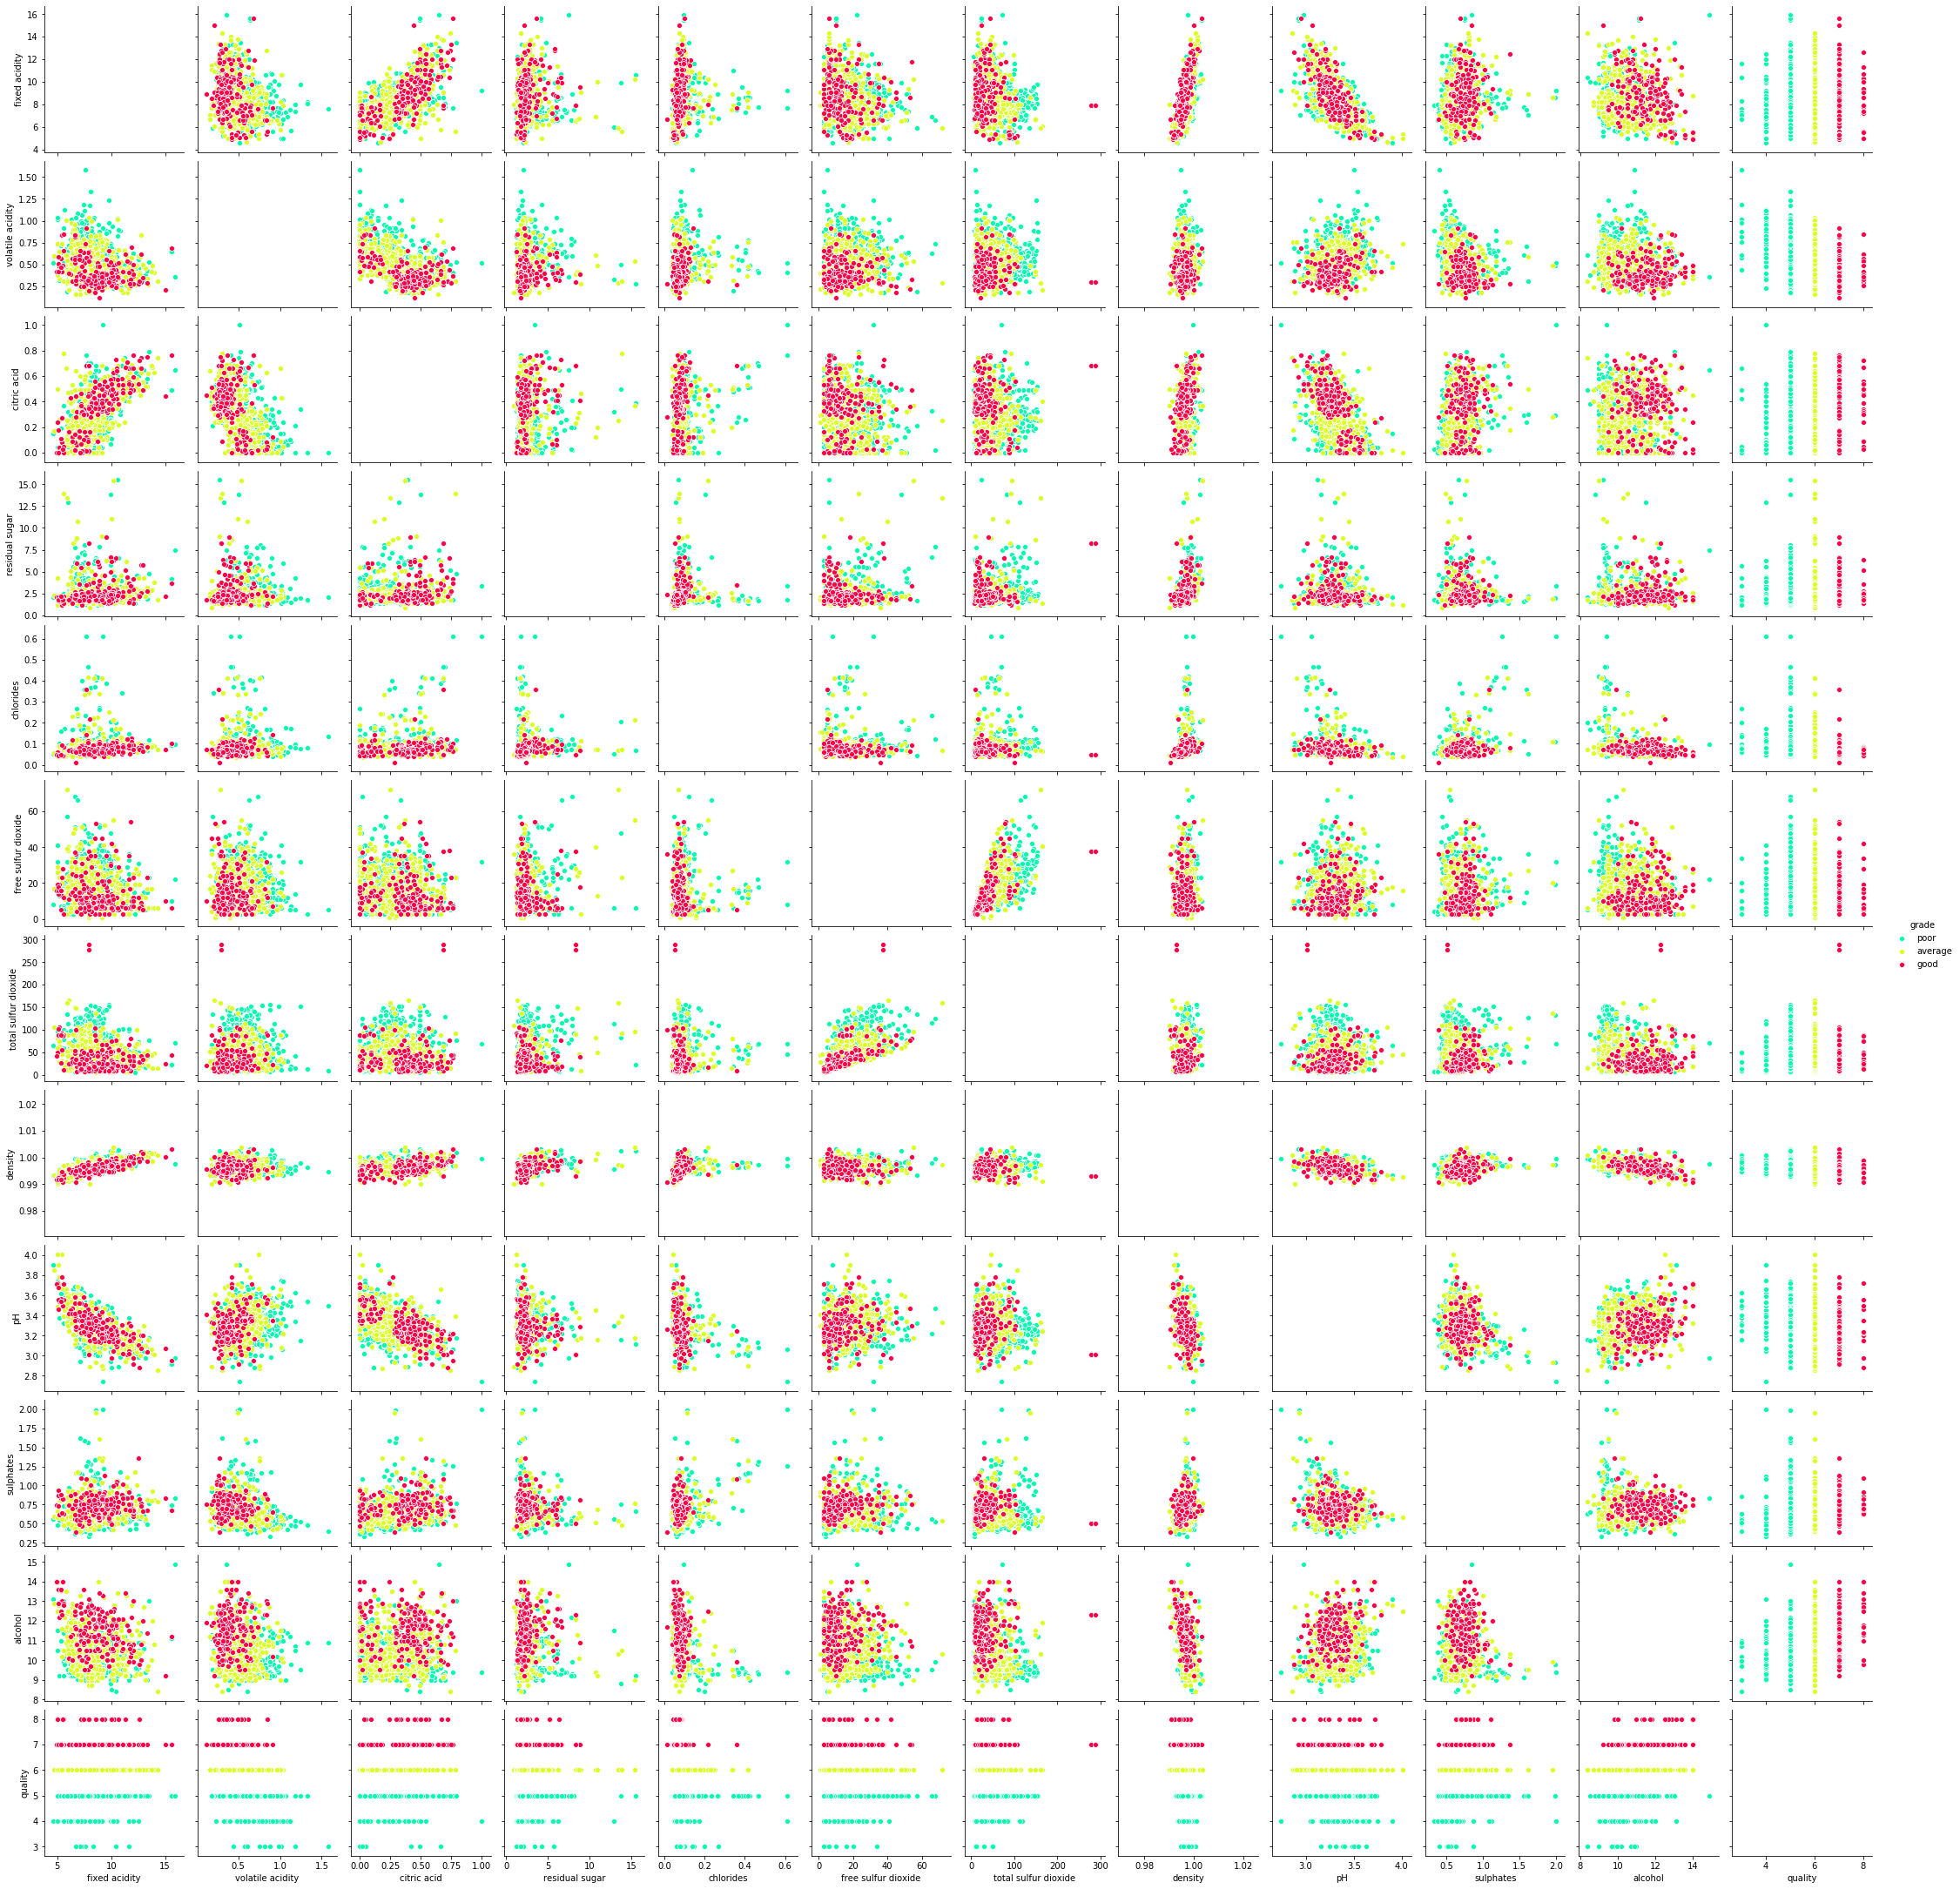

In [22]:
sns.pairplot(df, hue = 'grade', palette = 'gist_ncar', diag_kind = 'bar' )

## 10. Checking Sum of values after grouping by grade

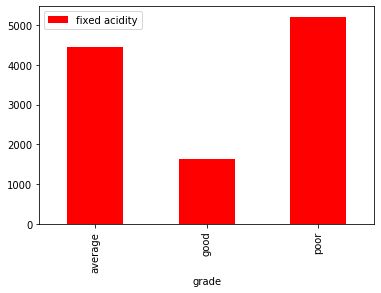

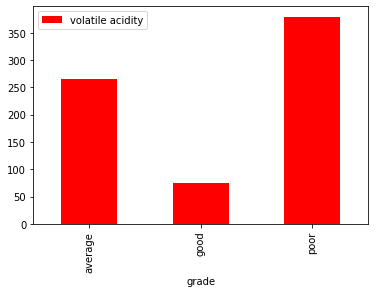

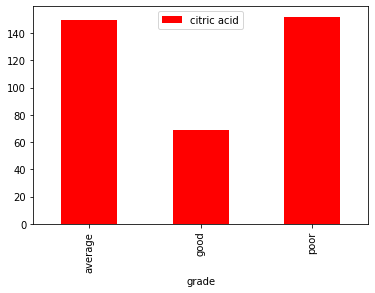

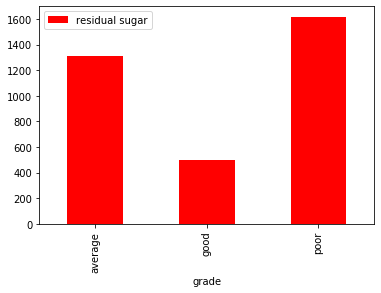

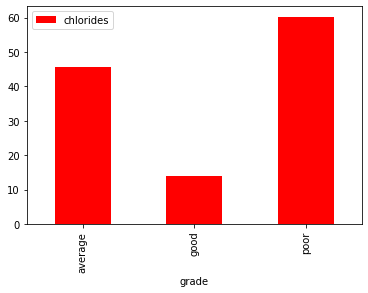

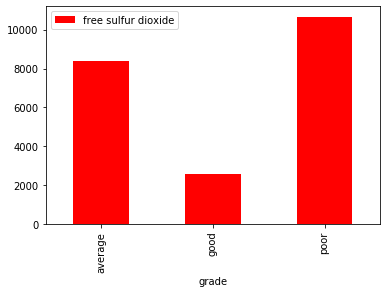

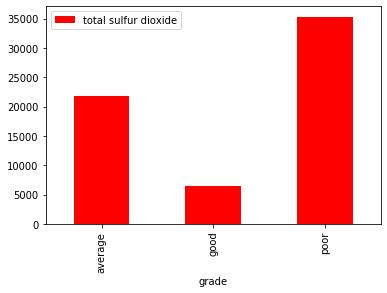

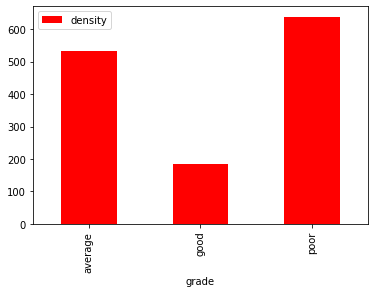

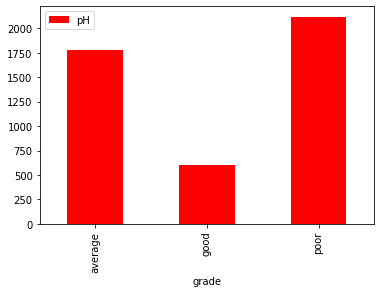

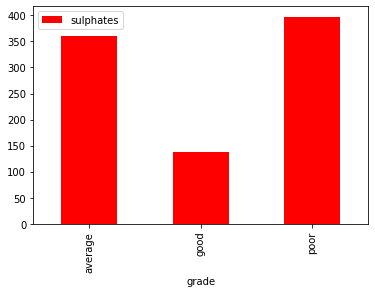

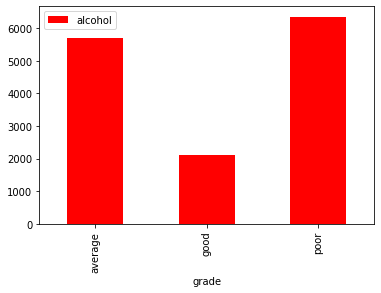

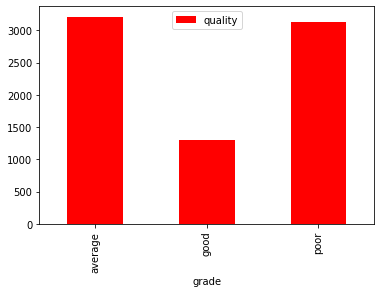

In [23]:
for col in df.iloc[:, :-1].columns:
    df.groupby('grade')[[col]].sum().plot(kind = 'bar', color = 'red')
    plt.show()

## 11. Creating a plot for mean and median after grouping by grade

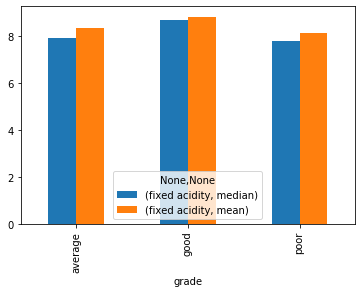

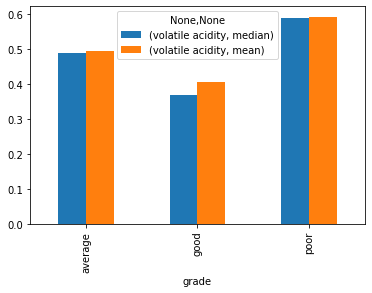

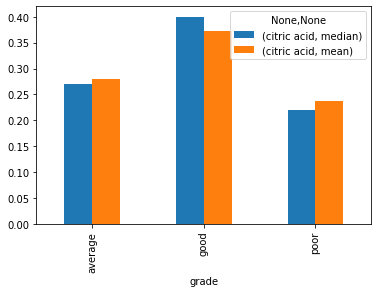

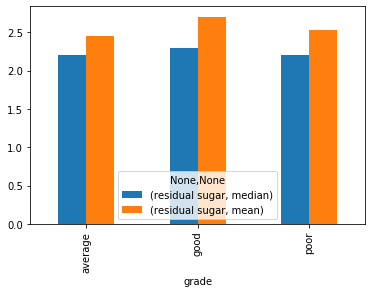

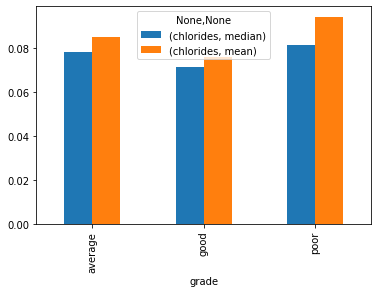

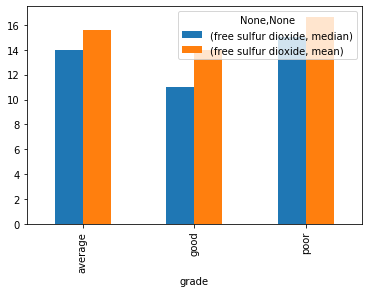

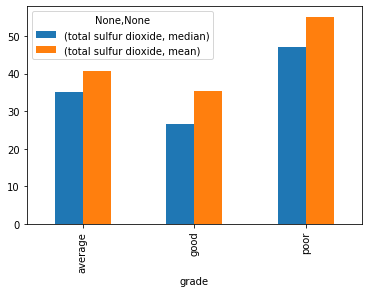

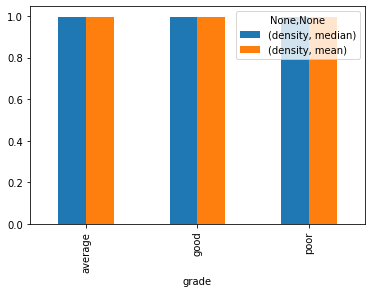

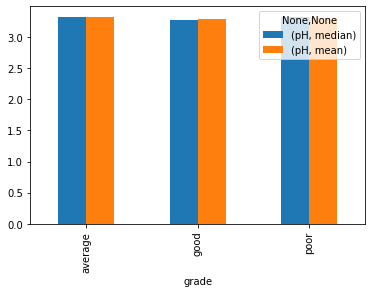

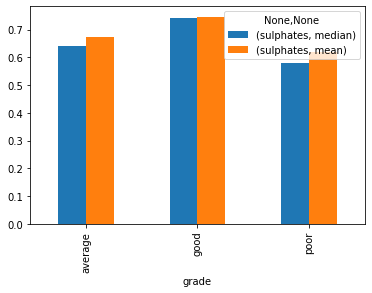

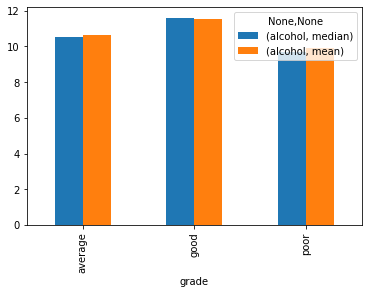

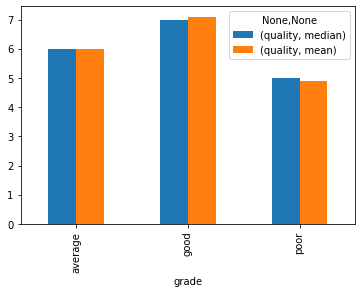

In [24]:
for col in df.iloc[:, :-1].columns:
    df.groupby('grade')[[col]].agg(['median', 'mean']).plot(kind = 'bar')
    plt.show()

## 12.Creating a Countplot for grade

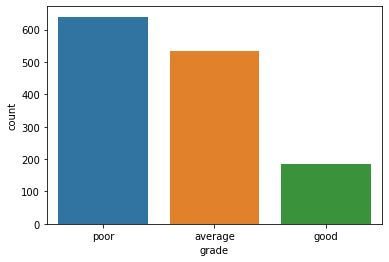

In [25]:
sns.countplot(x='grade',data=df)

## 13.Correlation Matrix

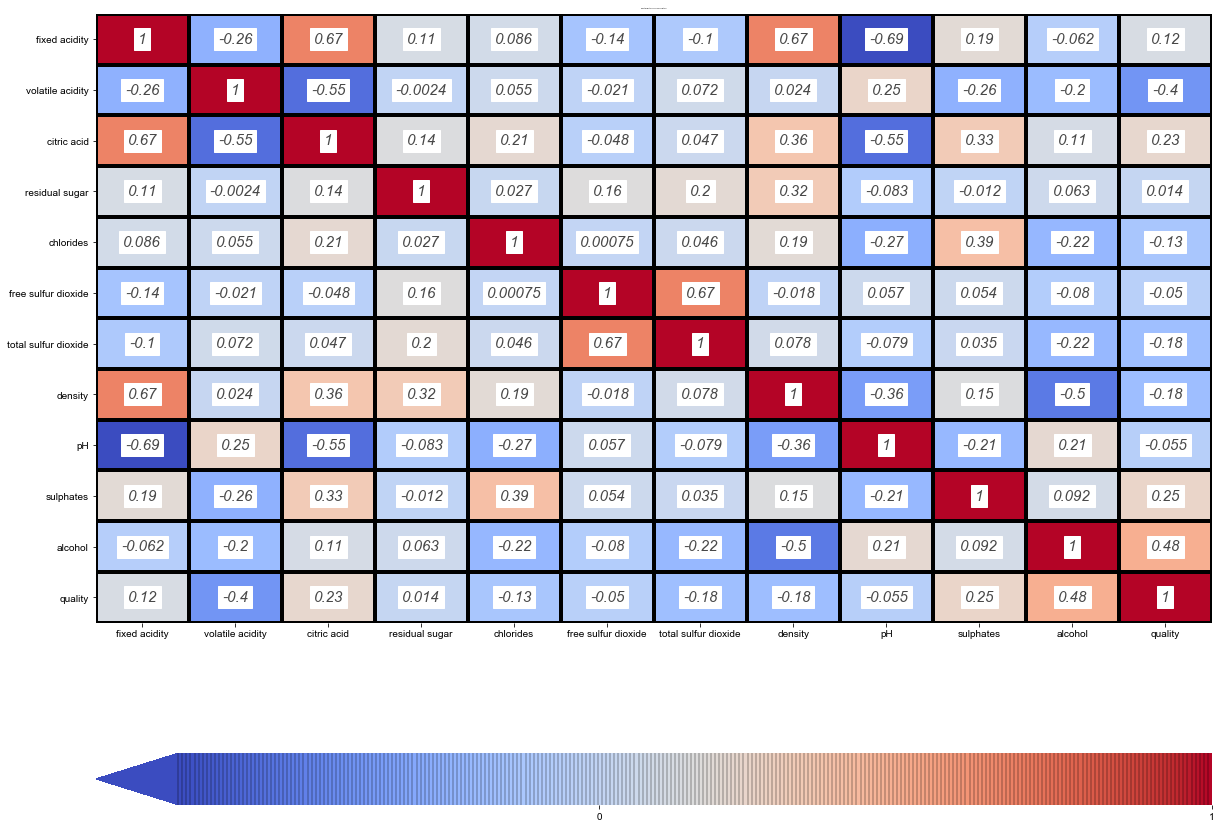

In [26]:
plt.figure(figsize=(20,16))
annot_kws={'fontsize': 15,'fontstyle':'italic','color':'k', 'alpha': 0.8,
'backgroundcolor':'w', 'verticalalignment':'center', 'rotation':'horizontal'}

cbar_kws={'orientation':'horizontal',
'shrink':1,
'extend':'min',
'extendfrac':0.08,
'ticks':np.arange(0,22),
'drawedges':True}

sns.heatmap(df.corr(), cmap='coolwarm', annot=True, annot_kws=annot_kws, cbar_kws=cbar_kws, linewidth=3, linecolor='k')
plt.title('heatmap to check correlation', fontsize=2)

sns.set(font_scale= 1.4)

## Checking spread of data

In [27]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Violin plot for grade v/s citric acid

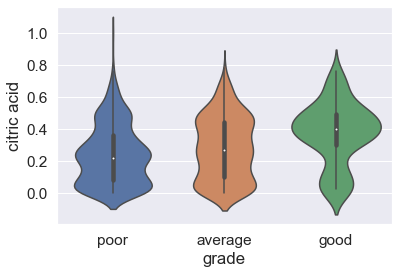

In [28]:
sns.violinplot(x = 'grade', y = 'citric acid', data = df)

## Boxplot for grade v/s citric acid

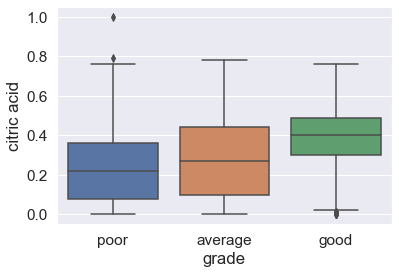

In [29]:
sns.boxplot(x = 'grade', y = 'citric acid', data = df)

## Swarmplot for grade v/s pH

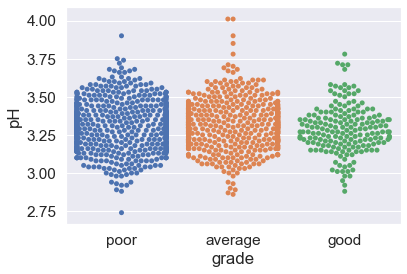

In [30]:
sns.swarmplot(x = 'grade', y = 'pH', data = df)

# Outlier Treatment

## Outlier Treatment

feature:  fixed acidity 
q1: 7.1 
q3:  9.2 
iqr:  2.0999999999999996 
lower_fence:  3.95 
upper_fence:  12.349999999999998 

Range: 4.6 - 12.349999999999998


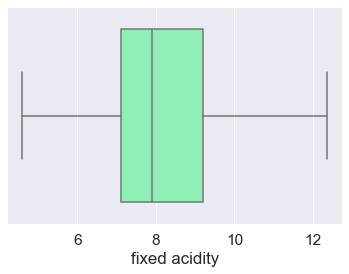

**************************************************************************************************** 


feature:  volatile acidity 
q1: 0.39 
q3:  0.64 
iqr:  0.25 
lower_fence:  0.015000000000000013 
upper_fence:  1.0150000000000001 

Range: 0.12 - 1.0150000000000001


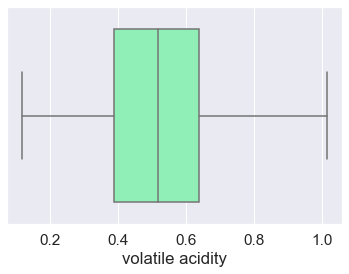

**************************************************************************************************** 


feature:  citric acid 
q1: 0.09 
q3:  0.43 
iqr:  0.33999999999999997 
lower_fence:  -0.42000000000000004 
upper_fence:  0.94 

Range: 0.0 - 0.94


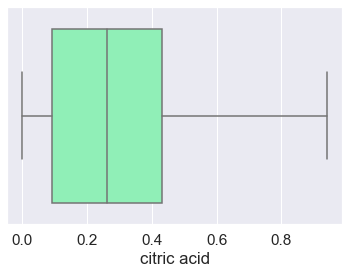

**************************************************************************************************** 


feature:  residual sugar 
q1: 1.9 
q3:  2.6 
iqr:  0.7000000000000002 
lower_fence:  0.8499999999999996 
upper_fence:  3.6500000000000004 

Range: 0.9 - 3.6500000000000004


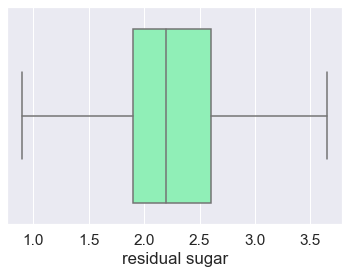

**************************************************************************************************** 


feature:  chlorides 
q1: 0.07 
q3:  0.091 
iqr:  0.02099999999999999 
lower_fence:  0.03850000000000002 
upper_fence:  0.12249999999999998 

Range: 0.03850000000000002 - 0.12249999999999998


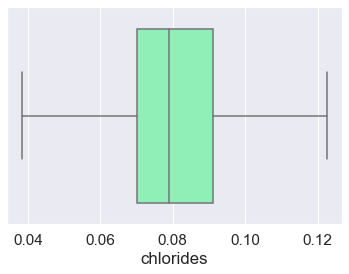

**************************************************************************************************** 


feature:  free sulfur dioxide 
q1: 7.0 
q3:  21.0 
iqr:  14.0 
lower_fence:  -14.0 
upper_fence:  42.0 

Range: 1.0 - 42.0


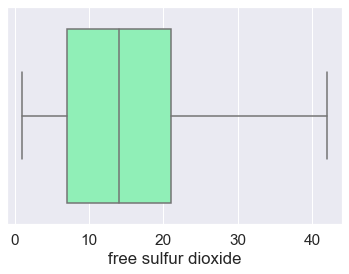

**************************************************************************************************** 


feature:  total sulfur dioxide 
q1: 22.0 
q3:  63.0 
iqr:  41.0 
lower_fence:  -39.5 
upper_fence:  124.5 

Range: 6.0 - 124.5


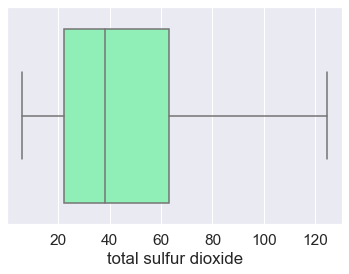

**************************************************************************************************** 


feature:  density 
q1: 0.9956 
q3:  0.99782 
iqr:  0.0022199999999999998 
lower_fence:  0.99227 
upper_fence:  1.00115 

Range: 0.99227 - 1.00115


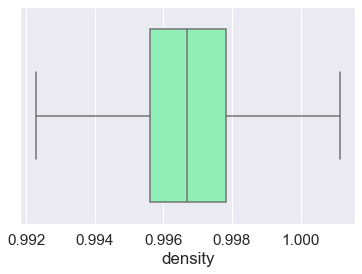

**************************************************************************************************** 


feature:  pH 
q1: 3.21 
q3:  3.4 
iqr:  0.18999999999999995 
lower_fence:  2.925 
upper_fence:  3.6849999999999996 

Range: 2.925 - 3.6849999999999996


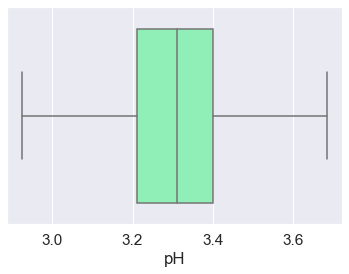

**************************************************************************************************** 


feature:  sulphates 
q1: 0.55 
q3:  0.73 
iqr:  0.17999999999999994 
lower_fence:  0.28000000000000014 
upper_fence:  0.9999999999999999 

Range: 0.33 - 0.9999999999999999


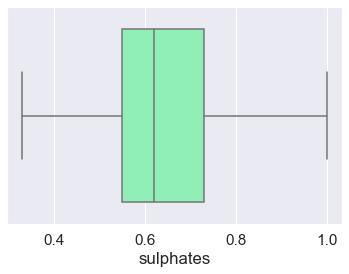

**************************************************************************************************** 


feature:  alcohol 
q1: 9.5 
q3:  11.1 
iqr:  1.5999999999999996 
lower_fence:  7.1000000000000005 
upper_fence:  13.5 

Range: 8.4 - 13.5


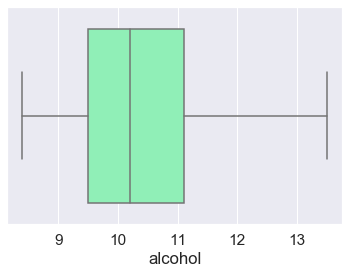

**************************************************************************************************** 




In [31]:
for col in df.columns:
    if df[col].dtype == int or df[col].dtype == float:
        q1, q3 = np.percentile(df[col], [25,75])
        iqr = q3-q1
        lower_fence = q1-(1.5 * iqr)
        upper_fence = q3+(1.5 * iqr)
    
        print("feature: ", col, '\nq1:', q1,'\nq3: ', q3, '\niqr: ', iqr, '\nlower_fence: ', lower_fence, '\nupper_fence: ', upper_fence, '\n')
        
        df[col] = df[col].apply(lambda x: upper_fence if x > upper_fence else lower_fence if x< lower_fence else x)
        range_finder(df[col])
        sns.boxplot(x = df[col], data= df, palette='rainbow', orient='h')
        plt.show()
        print('*'*100, '\n'*2)

# Machine Learning

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X = df.drop(['grade','quality'],1)
y = df['grade']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state= 41)

In [35]:
display(X_train.head(),
       X_test.head(),
       y_train.head(),
       y_test.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1082,7.2,0.38,0.30,1.8,0.073,31.0,70.0,0.99685,3.42,0.59,9.5
56,10.2,0.42,0.57,3.4,0.070,4.0,10.0,0.99710,3.04,0.63,9.6
929,8.7,0.33,0.38,3.3,0.063,10.0,19.0,0.99468,3.30,0.73,12.0
379,8.3,0.42,0.38,2.5,0.094,24.0,60.0,0.99790,3.31,0.70,10.8
1236,7.8,0.55,0.00,1.7,0.070,7.0,17.0,0.99659,3.26,0.64,9.4


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1436,10.0,0.38,0.38,1.6,0.1225,27.0,90.0,0.99914,3.15,0.65,8.5
1305,7.5,0.61,0.26,1.9,0.0730,24.0,88.0,0.99612,3.30,0.53,9.8
1219,9.0,0.39,0.40,1.3,0.0440,25.0,50.0,0.99478,3.20,0.83,10.9
358,11.9,0.43,0.66,3.1,0.1090,10.0,23.0,1.00000,3.15,0.85,10.4
1128,10.0,0.43,0.33,2.7,0.0950,28.0,89.0,0.99840,3.22,0.68,10.0


1082    average
56         poor
929        good
379     average
1236    average
Name: grade, dtype: object

1436       poor
1305       poor
1219    average
358        good
1128       poor
Name: grade, dtype: object

In [36]:
print('X_train: ', len(X_train), '\t', 'y_train', len(y_train))
print('X_test: ', len(X_test), '\t', 'y_test', len(y_test))

X_train:  951 	 y_train 951
X_test:  408 	 y_test 408


In [37]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

## Applying Random Forest Algorithm

In [38]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, mean_absolute_error, mean_squared_error, r2_score

In [39]:
rf = RandomForestClassifier(n_estimators=650, max_depth=22, random_state = 42) 
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=22, n_estimators=650, random_state=42)

### Predictions on Test data

In [40]:
y_test_predict = rf.predict(X_test)
y_test_predict[:15]

array(['poor', 'poor', 'average', 'average', 'poor', 'average', 'average',
       'poor', 'poor', 'poor', 'average', 'poor', 'good', 'poor', 'poor'],
      dtype=object)

In [41]:
print("Accuracy Score Testing Data", accuracy_score(y_test_predict,y_test)*100,'\n')
print("Classification Report" ,'\n', classification_report(y_test, y_test_predict))

Accuracy Score Testing Data 63.23529411764706 

Classification Report 
               precision    recall  f1-score   support

     average       0.58      0.58      0.58       172
        good       0.55      0.34      0.42        47
        poor       0.69      0.76      0.72       189

    accuracy                           0.63       408
   macro avg       0.61      0.56      0.57       408
weighted avg       0.63      0.63      0.63       408



In [42]:
cm = confusion_matrix(y_test, y_test_predict)
cm

array([[ 99,  12,  61],
       [ 28,  16,   3],
       [ 45,   1, 143]], dtype=int64)

### Predictions on train data

In [43]:
y_train_pred = rf.predict(X_train)

y_train_pred[:15]

array(['average', 'poor', 'good', 'average', 'average', 'average',
       'average', 'poor', 'poor', 'average', 'poor', 'poor', 'poor',
       'poor', 'poor'], dtype=object)

In [44]:
print("Accuracy Score Training Data", accuracy_score(y_train, y_train_pred)*100,'\n')
print("Classification Report" ,'\n', classification_report(y_train, y_train_pred))

Accuracy Score Training Data 100.0 

Classification Report 
               precision    recall  f1-score   support

     average       1.00      1.00      1.00       363
        good       1.00      1.00      1.00       137
        poor       1.00      1.00      1.00       451

    accuracy                           1.00       951
   macro avg       1.00      1.00      1.00       951
weighted avg       1.00      1.00      1.00       951



In [57]:
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[363,   0,   0],
       [  0, 137,   0],
       [  0,   0, 451]], dtype=int64)

In [58]:
## Clear case of over-fitting as train data is giving 100% accuracy and test data is giving 63%
## The model had picked up all sorts of noise in the data

## Using Grid search CV

In [45]:
## Importing Grid Search

from sklearn.model_selection import GridSearchCV

In [46]:
clf = RandomForestClassifier() # defining Classifier

param_dist = {
             "n_estimators": [500,850],
             'max_depth': [2,5,10],
             } #list of estimators i.e number of Tress to be Considered for Training

rf_gs = GridSearchCV(clf, param_grid=param_dist, cv = 6) # CV = 6 data will be split into train & test folds 6 times

In [47]:
# Fitting Gridsearch to Trainig Data:

rf_gs.fit(X_train, y_train)

GridSearchCV(cv=6, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 10], 'n_estimators': [500, 850]})

In [48]:
print(rf_gs.best_score_)

print(rf_gs.best_params_)

0.6435793328556644
{'max_depth': 10, 'n_estimators': 850}


In [49]:
## predictions on test data:

y_predict = rf_gs.predict(X_test)
y_predict[:15]

array(['poor', 'poor', 'average', 'average', 'poor', 'average', 'average',
       'poor', 'poor', 'poor', 'average', 'poor', 'good', 'average',
       'poor'], dtype=object)

In [50]:
## Checking accuracy and other metrices:

print("Accuracy Score Testing Data", accuracy_score(y_predict,y_test)*100,'\n')
print("Classification Report" ,'\n', classification_report(y_test, y_predict))

cm = confusion_matrix(y_test, y_predict)
cm

Accuracy Score Testing Data 63.23529411764706 

Classification Report 
               precision    recall  f1-score   support

     average       0.58      0.56      0.57       172
        good       0.55      0.34      0.42        47
        poor       0.69      0.77      0.73       189

    accuracy                           0.63       408
   macro avg       0.61      0.56      0.57       408
weighted avg       0.63      0.63      0.62       408



array([[ 97,  12,  63],
       [ 28,  16,   3],
       [ 43,   1, 145]], dtype=int64)

In [51]:
## Making predictions on train data:

y_train_pred = rf_gs.predict(X_train)

y_train_pred[:15]

array(['average', 'poor', 'good', 'average', 'average', 'average',
       'average', 'poor', 'poor', 'average', 'poor', 'poor', 'poor',
       'poor', 'poor'], dtype=object)

In [52]:
print("Accuracy Score Training Data", accuracy_score(y_train, y_train_pred)*100,'\n')
print("Classification Report" ,'\n', classification_report(y_train, y_train_pred))
cm = confusion_matrix(y_train, y_train_pred)
cm

Accuracy Score Training Data 98.84332281808622 

Classification Report 
               precision    recall  f1-score   support

     average       0.99      0.98      0.99       363
        good       1.00      0.96      0.98       137
        poor       0.98      1.00      0.99       451

    accuracy                           0.99       951
   macro avg       0.99      0.98      0.99       951
weighted avg       0.99      0.99      0.99       951



array([[357,   0,   6],
       [  2, 132,   3],
       [  0,   0, 451]], dtype=int64)

In [71]:
## Again, clear case of over-fitting

# Making predictions on the original values, i.e. 8 values of quality as target

In [53]:
X1 =  df.drop(['grade','quality'],1)
y1= df['quality']

In [54]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=41)

In [55]:
display(X1_train.head(),
       X1_test.head(),
       y1_train.head(),
       y1_test.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1082,7.2,0.38,0.30,1.8,0.073,31.0,70.0,0.99685,3.42,0.59,9.5
56,10.2,0.42,0.57,3.4,0.070,4.0,10.0,0.99710,3.04,0.63,9.6
929,8.7,0.33,0.38,3.3,0.063,10.0,19.0,0.99468,3.30,0.73,12.0
379,8.3,0.42,0.38,2.5,0.094,24.0,60.0,0.99790,3.31,0.70,10.8
1236,7.8,0.55,0.00,1.7,0.070,7.0,17.0,0.99659,3.26,0.64,9.4


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1436,10.0,0.38,0.38,1.6,0.1225,27.0,90.0,0.99914,3.15,0.65,8.5
1305,7.5,0.61,0.26,1.9,0.0730,24.0,88.0,0.99612,3.30,0.53,9.8
1219,9.0,0.39,0.40,1.3,0.0440,25.0,50.0,0.99478,3.20,0.83,10.9
358,11.9,0.43,0.66,3.1,0.1090,10.0,23.0,1.00000,3.15,0.85,10.4
1128,10.0,0.43,0.33,2.7,0.0950,28.0,89.0,0.99840,3.22,0.68,10.0


1082    6
56      5
929     7
379     6
1236    6
Name: quality, dtype: int64

1436    5
1305    5
1219    6
358     7
1128    5
Name: quality, dtype: int64

In [60]:
## Making predictions on test data

rf = RandomForestClassifier(n_estimators=650, max_depth=22, random_state = 42) 
rf.fit(X1_train,y1_train)

RandomForestClassifier(max_depth=22, n_estimators=650, random_state=42)

In [61]:
y1_pred = rf.predict(X1_test)

y1_pred[:15]

array([5, 5, 6, 6, 5, 6, 6, 5, 5, 5, 6, 5, 7, 5, 5], dtype=int64)

In [65]:
print("Accuracy Score Training Data", accuracy_score(y1_test, y1_pred)*100,'\n')
print("Classification Report" ,'\n', classification_report(y1_test, y1_pred))
cm = confusion_matrix(y1_test, y1_pred)
cm

Accuracy Score Training Data 58.57843137254902 

Classification Report 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        17
           5       0.63      0.73      0.68       169
           6       0.56      0.61      0.59       172
           7       0.44      0.26      0.33        42
           8       0.00      0.00      0.00         5

    accuracy                           0.59       408
   macro avg       0.27      0.27      0.27       408
weighted avg       0.54      0.59      0.56       408



array([[  0,   0,   2,   1,   0,   0],
       [  0,   0,  12,   4,   1,   0],
       [  0,   0, 123,  45,   1,   0],
       [  0,   0,  57, 105,   9,   1],
       [  0,   0,   1,  29,  11,   1],
       [  0,   0,   0,   2,   3,   0]], dtype=int64)

In [73]:
## Checking on train data

y1_train_pred = rf.predict(X1_train)

y1_train_pred[:15]

array([6, 5, 7, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5], dtype=int64)

In [74]:
print("Accuracy Score Training Data", accuracy_score(y1_train, y1_train_pred)*100,'\n')
print("Classification Report" ,'\n', classification_report(y1_train, y1_train_pred))
cm = confusion_matrix(y1_train, y1_train_pred)
cm

Accuracy Score Training Data 100.0 

Classification Report 
               precision    recall  f1-score   support

           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00       408
           6       1.00      1.00      1.00       363
           7       1.00      1.00      1.00       125
           8       1.00      1.00      1.00        12

    accuracy                           1.00       951
   macro avg       1.00      1.00      1.00       951
weighted avg       1.00      1.00      1.00       951



array([[  7,   0,   0,   0,   0,   0],
       [  0,  36,   0,   0,   0,   0],
       [  0,   0, 408,   0,   0,   0],
       [  0,   0,   0, 363,   0,   0],
       [  0,   0,   0,   0, 125,   0],
       [  0,   0,   0,   0,   0,  12]], dtype=int64)

In [87]:
## Again a clear case of underfitting

In [82]:
## Using grid search CV for this and making it a regression problem

clf = RandomForestRegressor()

param_dist = {
             "n_estimators": [500,850],
             'max_depth': [2,5,10],
             } #list of estimators i.e number of Tress to be Considered for Training

rf_gs_reg = GridSearchCV(clf, param_grid=param_dist, cv = 6) # CV = 6 data will be split into train & test folds 6 times

rf_gs_reg.fit(X1_train, y1_train)

GridSearchCV(cv=6, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 5, 10], 'n_estimators': [500, 850]})

In [83]:
print(rf_gs_reg.best_score_)
print(rf_gs_reg.best_params_)

0.3856260528618447
{'max_depth': 5, 'n_estimators': 850}


In [85]:
y1_test_pred = rf_gs_reg.predict(X_test)

In [86]:
y1_test_pred[:15] 

array([4.90781004, 5.18574273, 6.17623236, 5.87729136, 5.55896165,
       6.32511284, 5.47578511, 5.43436609, 5.22162515, 5.22040564,
       5.79300159, 5.25518835, 6.79189072, 6.05616374, 5.35120911])

In [87]:
## checking reports

print('MAE: ',mean_absolute_error(y1_test, y1_test_pred))

print('MSE: ', mean_squared_error(y1_test, y1_test_pred))

print('RMSE: ',np.sqrt(mean_squared_error(y1_test, y1_test_pred)))

print('R2: ',r2_score(y1_test, y1_test_pred)*100)

## Extremely bad fit

MAE:  0.5067876433514277
MSE:  0.420842403488176
RMSE:  0.6487236726744107
R2:  34.77663688528254


In [88]:
## using it on train data

y1_train_pred = rf_gs_reg.predict(X_train)

y1_train_pred[:15]

array([5.37509884, 5.39852722, 6.72838014, 5.8354954 , 5.44224547,
       5.25682445, 5.24948922, 5.29321331, 5.20765973, 6.23396967,
       5.63162055, 5.32691171, 5.12282452, 5.39315812, 5.09011248])

In [89]:
## checking reports

print('MAE: ',mean_absolute_error(y1_train, y1_train_pred))

print('MSE: ', mean_squared_error(y1_train, y1_train_pred))

print('RMSE: ',np.sqrt(mean_squared_error(y1_train, y1_train_pred)))

print('R2: ',r2_score(y1_train, y1_train_pred)*100)

## Extremely bad fit + a case of over-fitting

MAE:  0.42961830487096603
MSE:  0.2891351792694144
RMSE:  0.5377129152897616
R2:  58.19331185666816


In [ ]:
## Making changes in the target column again becasue class imbalane may also be causing problems

## Changing the target column to only 2 categories- good and bad

In [90]:
df['grade2'] = df['quality'].apply(lambda x: 'poor' if x<= 5 else 'good' )

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,grade,grade2
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,poor,poor
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,poor,poor
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,poor,poor
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,average,good
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,poor,poor


In [91]:
X = df.drop(['grade','quality', 'grade2'],1)
y= df['grade2']

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state= 33)

In [93]:
print('X_train: ', len(X_train), '\t', 'y_train', len(y_train))
print('X_test: ', len(X_test), '\t', 'y_test', len(y_test))

X_train:  951 	 y_train 951
X_test:  408 	 y_test 408


In [94]:
## Again, applying algorithms:

rf = RandomForestClassifier(n_estimators=650, max_depth=22, random_state = 42) 
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=22, n_estimators=650, random_state=42)

In [95]:
y_test_pred = rf.predict(X_test)

y_test_pred[:15]

array(['poor', 'good', 'poor', 'poor', 'poor', 'good', 'good', 'good',
       'good', 'poor', 'good', 'good', 'good', 'poor', 'poor'],
      dtype=object)

In [96]:
## Creating Reports

print("Accuracy Score Testing Data", accuracy_score(y_predict,y_test)*100,'\n')
print("Classification Report" ,'\n', classification_report(y_test, y_predict))

cm = confusion_matrix(y_test, y_predict)
cm

Accuracy Score Testing Data 26.715686274509803 

Classification Report 
               precision    recall  f1-score   support

     average       0.00      0.00      0.00         0
        good       0.34      0.05      0.08       210
        poor       0.47      0.50      0.48       198

    accuracy                           0.27       408
   macro avg       0.27      0.18      0.19       408
weighted avg       0.41      0.27      0.28       408



array([[  0,   0,   0],
       [ 88,  10, 112],
       [ 80,  19,  99]], dtype=int64)

In [97]:
## Checking on train

y_train_pred = rf.predict(X_train)

y_train_pred[:15]

array(['poor', 'poor', 'good', 'good', 'poor', 'poor', 'poor', 'good',
       'poor', 'good', 'good', 'poor', 'good', 'poor', 'good'],
      dtype=object)

In [98]:
print("Accuracy Score Testing Data", accuracy_score(y_train,y_train_pred)*100,'\n')
print("Classification Report" ,'\n', classification_report(y_train, y_train_pred))

cm = confusion_matrix(y_test, y_predict)
cm

Accuracy Score Testing Data 100.0 

Classification Report 
               precision    recall  f1-score   support

        good       1.00      1.00      1.00       509
        poor       1.00      1.00      1.00       442

    accuracy                           1.00       951
   macro avg       1.00      1.00      1.00       951
weighted avg       1.00      1.00      1.00       951



array([[  0,   0,   0],
       [ 88,  10, 112],
       [ 80,  19,  99]], dtype=int64)

In [99]:
## Extreme case of overfitting

# Uisng Grid Search to find best parameters

In [108]:
clf = RandomForestClassifier() # defining Classifier

param_dist = {
             "n_estimators": [500,550,600,650,700,750,800,850],
             'max_depth': [2,3,4,5,6,7,8,910],
             } #list of estimators i.e number of Tress to be Considered for Training

rf_gs = GridSearchCV(clf, param_grid=param_dist, cv = 6) 

rf_gs.fit(X_train, y_train) # Fitting Gridsearch to Trainig Data

GridSearchCV(cv=6, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 910],
                         'n_estimators': [500, 550, 600, 650, 700, 750, 800,
                                          850]})

In [109]:
print(rf_gs.best_score_)
# evaluated on a particular fold out of the 6-fold split that you gave for CV

0.7623464161558263


In [110]:
print(rf_gs.best_params_)
 # Parameter that gave the best results.

{'max_depth': 6, 'n_estimators': 550}


In [111]:
rf_gs.classes_

array(['good', 'poor'], dtype=object)

In [112]:
y_test_pred = rf_gs.predict(X_test)

y_test_pred[:15]

array(['poor', 'good', 'poor', 'good', 'poor', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'poor', 'good'],
      dtype=object)

In [113]:
print(metrics.classification_report(y_test_pred, y_test))
print("The RF model accuracy on Test data is %s" %metrics.accuracy_score(y_test_pred, y_test))

              precision    recall  f1-score   support

        good       0.82      0.72      0.77       239
        poor       0.66      0.78      0.71       169

    accuracy                           0.74       408
   macro avg       0.74      0.75      0.74       408
weighted avg       0.75      0.74      0.74       408

The RF model accuracy on Test data is 0.7426470588235294


In [114]:
y_train_pred = rf_gs.predict(X_train)
y_train_pred[:15]

array(['poor', 'poor', 'good', 'good', 'poor', 'good', 'poor', 'good',
       'good', 'good', 'good', 'good', 'good', 'poor', 'good'],
      dtype=object)

In [115]:
print(metrics.classification_report(y_train_pred, y_train))
print("The RF model accuracy on Test data is %s" %metrics.accuracy_score(y_train_pred, y_train))

              precision    recall  f1-score   support

        good       0.86      0.88      0.87       498
        poor       0.87      0.85      0.86       453

    accuracy                           0.87       951
   macro avg       0.87      0.87      0.87       951
weighted avg       0.87      0.87      0.87       951

The RF model accuracy on Test data is 0.8664563617245006


In [144]:
## better accuracy of prediction using grid search 
## params were causing a problem
## classes were causing a problem 
## class imabalnce was a problem
## Still a case of over fitting

## Using KNN algorithm

In [116]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [117]:
clf = KNeighborsClassifier(n_neighbors = 7, metric = 'euclidean')

In [118]:
clf.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [119]:
y_test_pred = clf.predict(X_test)

y_test_pred[:15]

array(['poor', 'good', 'good', 'poor', 'good', 'good', 'poor', 'good',
       'good', 'poor', 'poor', 'poor', 'good', 'poor', 'poor'],
      dtype=object)

In [120]:
print('Accuracy_score Testing Data: ',round(accuracy_score(y_test, y_test_pred)*100,2))

print('\n','Classification_report Testing data: ','\n','\n',classification_report(y_test, y_test_pred))

Accuracy_score Testing Data:  63.48

 Classification_report Testing data:  
 
               precision    recall  f1-score   support

        good       0.63      0.69      0.66       210
        poor       0.64      0.58      0.61       198

    accuracy                           0.63       408
   macro avg       0.63      0.63      0.63       408
weighted avg       0.63      0.63      0.63       408



In [121]:
## Predicting train

y_train_pred = clf.predict(X_train)
y_train_pred[:15]

array(['poor', 'poor', 'good', 'good', 'poor', 'poor', 'poor', 'good',
       'poor', 'poor', 'poor', 'poor', 'good', 'good', 'poor'],
      dtype=object)

In [122]:
print('Accuracy_score Testing Data: ',round(accuracy_score(y_train, y_train_pred)*100,2))

print('\n','Classification_report Testing data: ','\n','\n',classification_report(y_train, y_train_pred))

Accuracy_score Testing Data:  74.13

 Classification_report Testing data:  
 
               precision    recall  f1-score   support

        good       0.76      0.75      0.76       509
        poor       0.72      0.74      0.73       442

    accuracy                           0.74       951
   macro avg       0.74      0.74      0.74       951
weighted avg       0.74      0.74      0.74       951



In [123]:
## again an overfit but not very large

In [125]:
## Trying Grid search CV

clf = KNeighborsClassifier()

p = {'n_neighbors' : [3,5,7,9,11,13,15,21,25,31],
    'metric':['manhattan','eucledian']
    }

model = GridSearchCV(clf,param_grid= p, cv = 4, verbose = 5)

model.fit(X_train, y_train)


Fitting 4 folds for each of 20 candidates, totalling 80 fits
[CV] metric=manhattan, n_neighbors=3 .................................
[CV] ..... metric=manhattan, n_neighbors=3, score=0.584, total=   0.0s
[CV] metric=manhattan, n_neighbors=3 .................................
[CV] ..... metric=manhattan, n_neighbors=3, score=0.647, total=   0.0s
[CV] metric=manhattan, n_neighbors=3 .................................
[CV] ..... metric=manhattan, n_neighbors=3, score=0.714, total=   0.0s
[CV] metric=manhattan, n_neighbors=3 .................................
[CV] ..... metric=manhattan, n_neighbors=3, score=0.612, total=   0.0s
[CV] metric=manhattan, n_neighbors=5 .................................
[CV] ..... metric=manhattan, n_neighbors=5, score=0.605, total=   0.0s
[CV] metric=manhattan, n_neighbors=5 .................................
[CV] ..... metric=manhattan, n_neighbors=5, score=0.672, total=   0.0s
[CV] metric=manhattan, n_neighbors=5 .................................
[CV] ..... metri

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV] ..... metric=manhattan, n_neighbors=7, score=0.634, total=   0.0s
[CV] metric=manhattan, n_neighbors=7 .................................
[CV] ..... metric=manhattan, n_neighbors=7, score=0.676, total=   0.0s
[CV] metric=manhattan, n_neighbors=7 .................................
[CV] ..... metric=manhattan, n_neighbors=7, score=0.685, total=   0.0s
[CV] metric=manhattan, n_neighbors=7 .................................
[CV] ..... metric=manhattan, n_neighbors=7, score=0.671, total=   0.0s
[CV] metric=manhattan, n_neighbors=9 .................................
[CV] ..... metric=manhattan, n_neighbors=9, score=0.664, total=   0.0s
[CV] metric=manhattan, n_neighbors=9 .................................
[CV] ..... metric=manhattan, n_neighbors=9, score=0.693, total=   0.0s
[CV] metric=manhattan, n_neighbors=9 .................................
[CV] ..... metric=manhattan, n_neighbors=9, score=0.702, total=   0.0s
[CV] metric=manhattan, n_neighbors=9 .................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    1.2s finished


GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['manhattan', 'eucledian'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 21, 25, 31]},
             verbose=5)

In [126]:
print('Best Params: ',model.best_params_)

print('model_best_score_ :',np.round((model.best_score_)*100,2 ))


Best Params:  {'metric': 'manhattan', 'n_neighbors': 21}
model_best_score_ : 68.56


In [127]:
y_test_pred = model.predict(X_test)
y_test_pred[:15]

array(['poor', 'good', 'poor', 'poor', 'good', 'good', 'good', 'good',
       'poor', 'poor', 'good', 'poor', 'good', 'poor', 'poor'],
      dtype=object)

In [128]:
print('Accuracy_score Testing Data: ',round(accuracy_score(y_test, y_test_pred)*100,2))

print('\n','Classification_report Testing data: ','\n','\n',classification_report(y_test, y_test_pred))

Accuracy_score Testing Data:  66.42

 Classification_report Testing data:  
 
               precision    recall  f1-score   support

        good       0.66      0.70      0.68       210
        poor       0.66      0.62      0.64       198

    accuracy                           0.66       408
   macro avg       0.66      0.66      0.66       408
weighted avg       0.66      0.66      0.66       408



In [129]:
## Predicting train data

y_train_pred = model.predict(X_train)
y_train_pred[:15]

array(['poor', 'poor', 'good', 'good', 'poor', 'poor', 'poor', 'good',
       'good', 'poor', 'good', 'good', 'good', 'good', 'poor'],
      dtype=object)

In [130]:
print('Accuracy_score Testing Data: ',round(accuracy_score(y_train, y_train_pred)*100,2))

print('\n','Classification_report Testing data: ','\n','\n',classification_report(y_train, y_train_pred))

Accuracy_score Testing Data:  72.34

 Classification_report Testing data:  
 
               precision    recall  f1-score   support

        good       0.75      0.73      0.74       509
        poor       0.70      0.71      0.71       442

    accuracy                           0.72       951
   macro avg       0.72      0.72      0.72       951
weighted avg       0.72      0.72      0.72       951



In [ ]:
## Much better results and not a very high level of over-fitting